In [1]:
import pandas as pd
import os
import igraph as ig

In [3]:
import pandas as pd

def load_mcl_clusters(file):
    families = []
    with open(file) as f:
        for line in f:
            genes = line.strip().split()
            if len(genes) >= 2:   # убираем singleton
                families.append(genes)
    return families

datasets = {
    "strict": load_mcl_clusters("blast_strict.mcl_clusters.txt"),
    "medium": load_mcl_clusters("blast_medium.mcl_clusters.txt"),
    "lenient": load_mcl_clusters("blast_lenient.mcl_clusters.txt"),
}

summary = []

for name, fams in datasets.items():
    sizes = [len(f) for f in fams]
    genes = sum(sizes)
    summary.append({
        "dataset": name,
        "families_total": len(fams),
        "genes_in_families": genes,
        "duplicated_genes_(family_size>=2)": genes,
        "max_family_size": max(sizes),
        "median_family_size": pd.Series(sizes).median()
    })

summary_df = pd.DataFrame(summary)
summary_df


,dataset,families_total,genes_in_families,duplicated_genes_(family_size>=2),max_family_size,median_family_size
0,strict,5028,17931,17931,70,2.0
1,medium,4750,22576,22576,210,3.0
2,lenient,4700,24111,24111,462,3.0


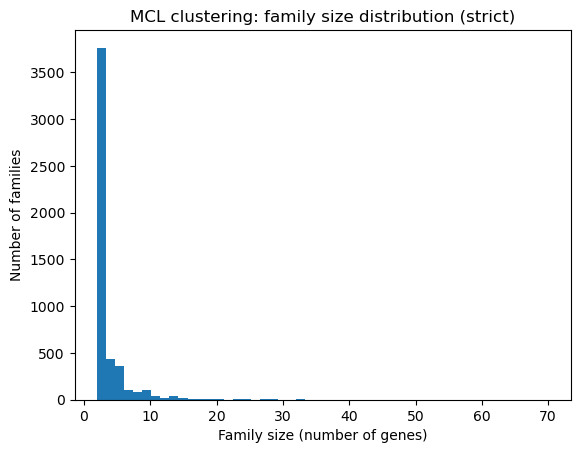

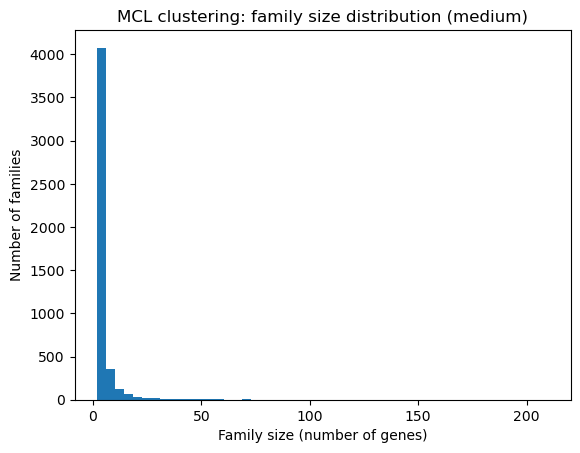

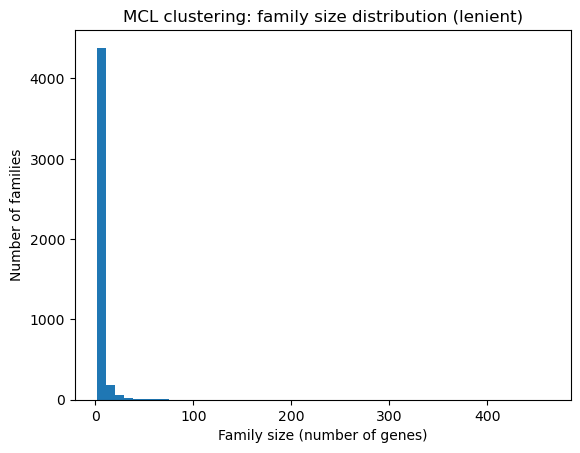

In [4]:
import matplotlib.pyplot as plt

for name, fams in datasets.items():
    sizes = [len(f) for f in fams]
    plt.figure()
    plt.hist(sizes, bins=50)
    plt.title(f"MCL clustering: family size distribution ({name})")
    plt.xlabel("Family size (number of genes)")
    plt.ylabel("Number of families")
    plt.show()
